# Correlation between housing data and vaccination data (stratified by age)

### Project authors:

### Created on: Sept 25, 2021

### Last modified on: Sept 25, 2021

## Import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Part I: Data exploration

In [23]:
# load dataframes
chsa_df = pd.read_csv('../data/BCCDC_COVID19_CHSA_Data.csv')
socio_df = pd.read_csv('../data/socioeco_compiled.csv')

# subset dataframes
chsa_df = chsa_df[['CHSA18_Code','D1_12_17_coverage','D1_18_49_coverage','D1_50_coverage']]
socio_df = socio_df[['code','hsa','subregion','percent_dwellings_need_repairs','avg_household_size',
'percent_detached_houses','total_private_dwellings','percent_renters']]
chsa_df.columns = ['code','12-17','18-49','50+']

In [24]:
# merge dataframes
merged = pd.merge(chsa_df, socio_df, how = 'inner', on="code")
print(len(merged))
merged.head()

122


,code,12-17,18-49,50+,hsa,subregion,percent_dwellings_need_repairs,avg_household_size,percent_detached_houses,total_private_dwellings,percent_renters
0,1260,57,67,84,Interior Health,Grand Forks,9.4%,2.1,83.8%,3940,15.1%
1,1270,41,62,75,Interior Health,Kettle Valley,10.0%,2.0,79.5%,1655,14.2%
2,1310,71,84,90,Island Health,Southern Okanagan,6.6%,2.1,69.0%,8755,21.2%
3,1320,78,78,89,Interior Health,Penticton,6.2%,2.1,51.1%,19080,32.3%
4,1330,64,77,81,Interior Health,Keremeos,8.6%,2.1,71.4%,2395,20.5%


In [25]:
# remove percent signs
merged = merged.replace({'%':''}, regex = True)
merged.head()

,code,12-17,18-49,50+,hsa,subregion,percent_dwellings_need_repairs,avg_household_size,percent_detached_houses,total_private_dwellings,percent_renters
0,1260,57,67,84,Interior Health,Grand Forks,9.4,2.1,83.8,3940,15.1
1,1270,41,62,75,Interior Health,Kettle Valley,10.0,2.0,79.5,1655,14.2
2,1310,71,84,90,Island Health,Southern Okanagan,6.6,2.1,69.0,8755,21.2
3,1320,78,78,89,Interior Health,Penticton,6.2,2.1,51.1,19080,32.3
4,1330,64,77,81,Interior Health,Keremeos,8.6,2.1,71.4,2395,20.5


In [26]:
merged = merged.drop(['code'], axis = 1)

## Part II: Data visualization

<AxesSubplot:>

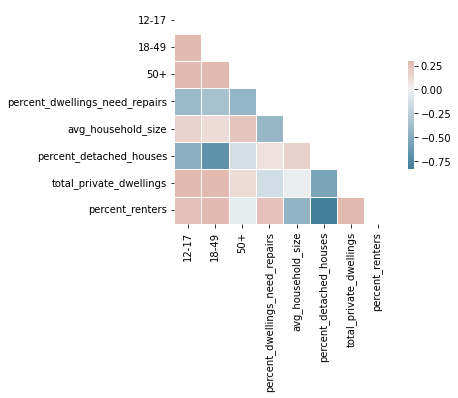

In [27]:
# create a heat map that shows correlation between vaccination status of different age groups
# and the housing variables we're examining
num_vars = ['percent_dwellings_need_repairs','avg_household_size',
'percent_detached_houses','total_private_dwellings','percent_renters','12-17','18-49','50+']
merged = merged.apply(lambda col:pd.to_numeric(col, errors='coerce') if col.name in num_vars else col)
corr = merged.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Let's plot out some of these variables with vaccination status individually.

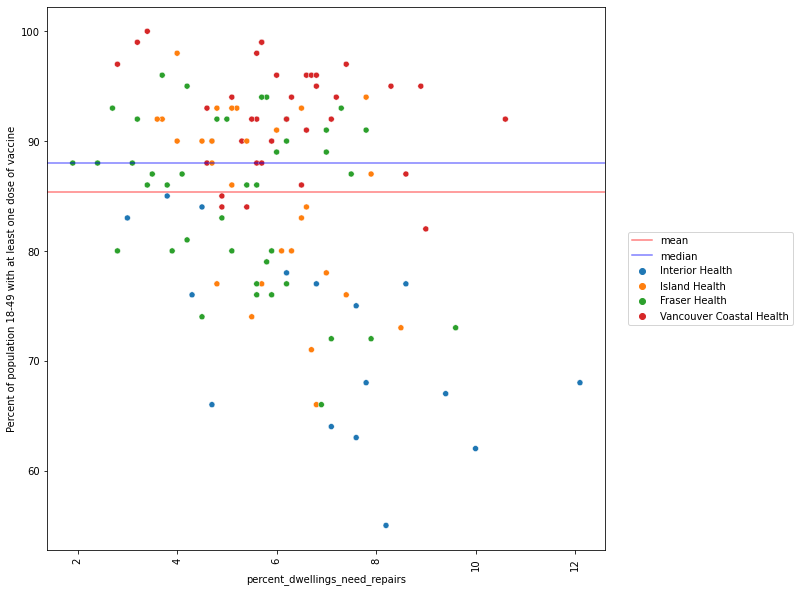

In [28]:
# make a figure that shows percent of dwellings that need major repairs vs.
# 18-49 year-olds that are vaccinated
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x= 'percent_dwellings_need_repairs', y='18-49', hue = 'hsa', data = merged)
plt.xticks(rotation = 'vertical')
plt.xlabel('percent_dwellings_need_repairs')
plt.ylabel('Percent of population 18-49 with at least one dose of vaccine')
# mean among all local health authorities is red horizontal line
plt.axhline(y=merged['18-49'].mean(), color = 'r', alpha = 0.5, label = 'mean')
# median among all local health authorities is blue horizontal line
plt.axhline(y=merged['18-49'].median(), color = 'b', alpha = 0.5, label = 'median')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

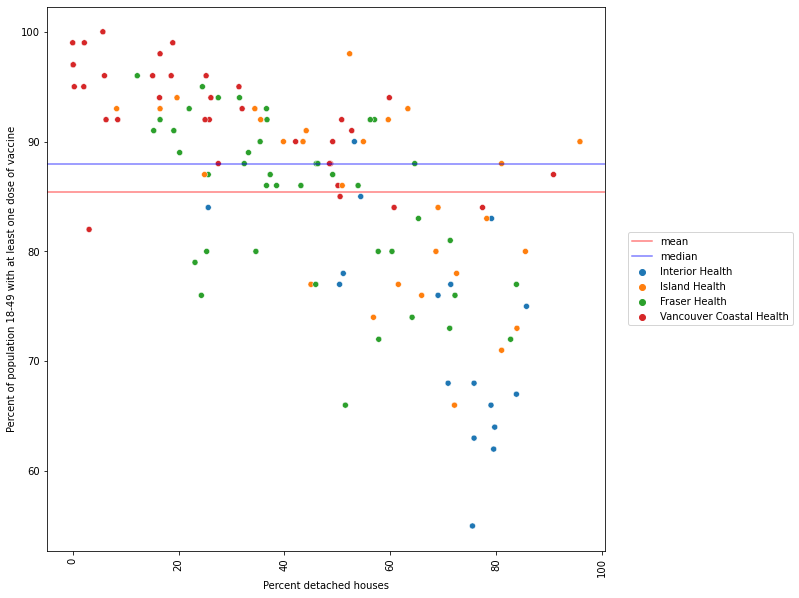

In [29]:
# make a figure that shows percent of houses that are detached vs.
# 18-49 year-olds that are vaccinated
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x= 'percent_detached_houses', y='18-49', hue = 'hsa', data = merged)
plt.xticks(rotation = 'vertical')
plt.xlabel('Percent detached houses')
plt.ylabel('Percent of population 18-49 with at least one dose of vaccine')
# mean among all local health authorities is red horizontal line
plt.axhline(y=merged['18-49'].mean(), color = 'r', alpha = 0.5, label = 'mean')
# median among all local health authorities is blue horizontal line
plt.axhline(y=merged['18-49'].median(), color = 'b', alpha = 0.5, label = 'median')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

Now we're going to create a heatmap that visualizes the correlation between vaccination status of all individuals 12+ with the variables that we've selected for modelling.

In [34]:
# load dataframes
modelling_df = pd.read_csv('../data/socioeco_compiled.csv')
vaccine_df = pd.read_csv('../data/BCCDC_COVID19_CHSA_Data.csv')
# subset dataframes
modelling_df = modelling_df[['code','percent_dwellings_need_repairs','percent_detached_houses',
'situational_vulnerability', 'percent_aboriginal', 'percent_chinese', 'percent_filipino', 'percent_white',
'percent_immigrant', 'percent_no_eng_fra', 'percent_less_than_high_school']]
vaccine_df = vaccine_df[['CHSA18_Code','D1_12_coverage']]
vaccine_df.columns = ['code', 'D1_12_coverage']

# merge dataframes
m_df = pd.merge(modelling_df, vaccine_df, how = 'inner', on="code")
print(len(m_df))
m_df.head()

116


,code,percent_dwellings_need_repairs,percent_detached_houses,situational_vulnerability,percent_aboriginal,percent_chinese,percent_filipino,percent_white,percent_immigrant,percent_no_eng_fra,percent_less_than_high_school,D1_12_coverage
0,3112,5.4%,60.7%,3.0,0.6%,65.4%,4.2%,18.5%,65.4%,13.3%,13.0%,84
1,3223,10.6%,8.5%,4.0,7.8%,13.4%,3.0%,64.2%,26.6%,4.3%,14.0%,89
2,3115,4.6%,48.7%,2.0,1.6%,30.9%,5.3%,46.8%,40.4%,4.4%,10.4%,90
3,3261,7.2%,16.4%,4.0,1.5%,40.2%,8.9%,27.0%,52.2%,9.1%,16.6%,92
4,3312,6.2%,6.3%,2.0,3.8%,4.2%,6.6%,62.7%,41.4%,1.8%,8.5%,91


In [35]:
# remove percent signs
m_df = m_df.replace({'%':''}, regex = True)
m_df = m_df.drop(['code'], axis = 1)


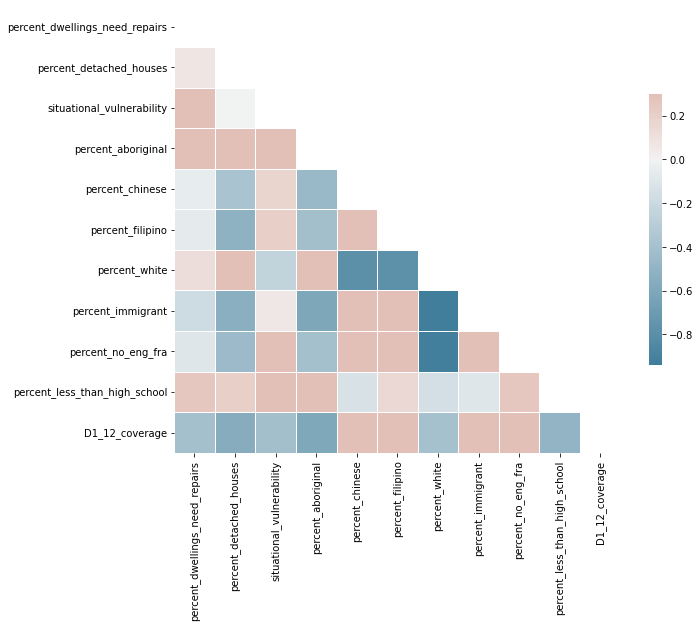

In [40]:
# plot the heat map
plt.figure(figsize = (10,10))
m_df = m_df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
corr = m_df.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
